In [125]:
import pandas as pd
import numpy as np
from analytics_tools.analytics_tools3 import freq_discrete

In [126]:
df = pd.read_csv('./weekly-sales-transactions/Sales_Transactions_Dataset_Weekly.csv')

In [127]:
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [128]:
df.drop(['MIN','MAX']+[x for x in df.columns if x.startswith('Normalized')],inplace=True,axis=1)

In [129]:
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


In [130]:
list(reversed([1,2,3]))

[3, 2, 1]

In [131]:
dict(zip(['W0', 'W1', 'W2', 'W3', 'W4', 'W5'],['t_%d'%x for x in range(1,7)]))

{'W0': 't_1', 'W1': 't_2', 'W2': 't_3', 'W3': 't_4', 'W4': 't_5', 'W5': 't_6'}

In [132]:
%%time
for t in range(5,51):
    lst_var  = ['W%d'%x for x in range(t-5,t+1)]
    lst_tgt = ['W%d'%(t+1)]
    #print lst_var,lst_tgt
    aux = df[lst_var+lst_tgt+['Product_Code']].copy()
    aux.rename(columns=dict(zip(lst_var,list(reversed(['t_%d'%x for x in range(1,7)])))),inplace=True) 
    aux.rename(columns={lst_tgt[0]:'y'},inplace=True)
    aux['t'] = t
    if t == 5:
        f = aux.copy()
    else:
        f = pd.concat([f,aux],ignore_index=True)

CPU times: user 223 ms, sys: 218 µs, total: 223 ms
Wall time: 221 ms


In [133]:
f.head()

,t_6,t_5,t_4,t_3,t_2,t_1,y,Product_Code,t
0,11,12,10,8,13,12,14,P1,5
1,7,6,3,2,7,1,6,P2,5
2,7,11,8,9,10,8,7,P3,5
3,12,8,13,5,9,6,9,P4,5
4,8,5,13,11,6,7,9,P5,5


In [134]:
%%time
for k in [3,6]:
    for func in ['min','max','sum','median','mean']:
        f['v_%s_%d'%(func,k)]=f[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)

CPU times: user 2.47 s, sys: 22.8 ms, total: 2.49 s
Wall time: 2.54 s


In [135]:
f.head()

,t_6,t_5,t_4,t_3,t_2,t_1,y,Product_Code,t,v_min_3,v_max_3,v_sum_3,v_median_3,v_mean_3,v_min_6,v_max_6,v_sum_6,v_median_6,v_mean_6
0,11,12,10,8,13,12,14,P1,5,8,13,33,12.0,11.000000,8,13,66,11.5,11.000000
1,7,6,3,2,7,1,6,P2,5,1,7,10,2.0,3.333333,1,7,26,4.5,4.333333
2,7,11,8,9,10,8,7,P3,5,8,10,27,9.0,9.000000,7,11,53,8.5,8.833333
3,12,8,13,5,9,6,9,P4,5,5,9,20,6.0,6.666667,5,13,53,8.5,8.833333
4,8,5,13,11,6,7,9,P5,5,6,11,24,7.0,8.000000,5,13,50,7.5,8.333333


In [136]:
f.drop(['t_%d'%x for x in range(1,7)],axis=1,inplace=True)

In [137]:
f.head()

,y,Product_Code,t,v_min_3,v_max_3,v_sum_3,v_median_3,v_mean_3,v_min_6,v_max_6,v_sum_6,v_median_6,v_mean_6
0,14,P1,5,8,13,33,12.0,11.000000,8,13,66,11.5,11.000000
1,6,P2,5,1,7,10,2.0,3.333333,1,7,26,4.5,4.333333
2,7,P3,5,8,10,27,9.0,9.000000,7,11,53,8.5,8.833333
3,9,P4,5,5,9,20,6.0,6.666667,5,13,53,8.5,8.833333
4,9,P5,5,6,11,24,7.0,8.000000,5,13,50,7.5,8.333333


In [138]:
var = [v for v in f.columns if v[:2]=='v_']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16e6f45650>,
      dtype=object)

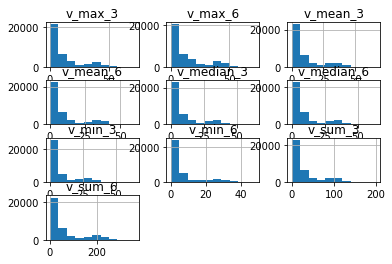

In [139]:
f[var].hist()

In [140]:
f[var].describe(percentiles = [0.95,0.99])

,v_min_3,v_max_3,v_sum_3,v_median_3,v_mean_3,v_min_6,v_max_6,v_sum_6,v_median_6,v_mean_6
count,37306.000000,37306.00000,37306.000000,37306.000000,37306.000000,37306.000000,37306.000000,37306.000000,37306.000000,37306.000000
mean,6.857985,11.00973,26.601673,8.733957,8.867224,5.964644,12.292178,53.325149,8.717512,8.887525
std,10.099613,13.56838,35.113164,11.732549,11.704388,9.208264,14.504411,70.035348,11.669178,11.672558
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,5.00000,11.000000,4.000000,3.666667,1.000000,6.000000,22.000000,3.500000,3.666667
95%,31.000000,42.00000,108.000000,36.000000,36.000000,28.000000,45.000000,216.000000,36.000000,36.000000
99%,37.000000,50.00000,127.000000,43.000000,42.333333,34.000000,52.000000,246.000000,41.500000,41.000000
max,64.000000,72.00000,200.000000,64.000000,66.666667,48.000000,72.000000,361.000000,64.000000,60.166667


In [141]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [142]:
scx = MinMaxScaler()
scy = MinMaxScaler()
ann = MLPRegressor(activation='relu',hidden_layer_sizes=(20,20,))

In [143]:
X= f[var]
y= f[['y']]

In [144]:
scx.fit(X)
scy.fit(y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [145]:
Xs = pd.DataFrame(scx.transform(X),columns=X.columns)
ys = scy.transform(y)

In [146]:
Xt,Xv,yt,yv = train_test_split(Xs,ys,train_size=0.7)

/home/jose/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [147]:
for p in [Xt,Xv,yt,yv]:
    print p.shape

(26114, 10)
(11192, 10)
(26114, 1)
(11192, 1)


In [148]:
%%time
ann.fit(Xt,yt)

/home/jose/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 404 ms, sys: 295 µs, total: 404 ms
Wall time: 410 ms


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [149]:
from sklearn.metrics import r2_score

In [150]:
print r2_score(y_pred=ann.predict(Xt),y_true=yt)
print r2_score(y_pred=ann.predict(Xv),y_true=yv)

0.9006870873986481
0.897632092390972


In [171]:
test = pd.DataFrame({'y^':ann.predict(Xv)})

In [172]:
test ['y'] = yv

test = pd.DataFrame(scy.inverse_transform(test),columns=test.columns)

In [173]:
import seaborn as sns


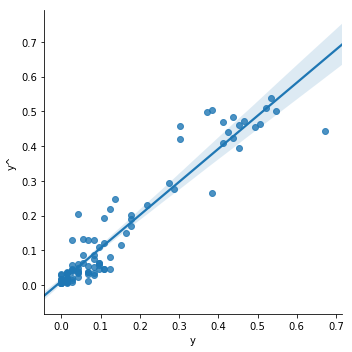

In [176]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)